In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=18ljByZl91tgcb3k4yu7lSqsv2yZ_QbNj' 
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('dogtrain.csv')  

18ljByZl91tgcb3k4yu7lSqsv2yZ_QbNj


In [0]:
link = 'https://drive.google.com/open?id=1BJJrnSaoq7vG4w4DZapihnSpMdF31lkE' 
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('cattest.csv')  

1BJJrnSaoq7vG4w4DZapihnSpMdF31lkE


In [0]:
link = 'https://drive.google.com/open?id=1SYgWfVIwDH_e5usSPhHgDJziTXQQlXWH' 
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('dogtest.csv')  

1SYgWfVIwDH_e5usSPhHgDJziTXQQlXWH


In [0]:
from __future__ import absolute_import, division, print_function

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

1.15.0


In [0]:
dogtrain = pd.read_csv("dogtrain.csv", skiprows = 0)
dogtest = pd.read_csv("dogtest.csv", skiprows = 0)

In [0]:
cattrain.shape

(867, 148)

In [0]:
cattrain.head(900)

,Unnamed: 0,Unnamed: 0.1,Age,Quantity,Fee,PhotoAmt,Gender_Male,Gender_Mix,MaturitySize_Large,MaturitySize_Medium,MaturitySize_Small,"Colors_Black, Brown","Colors_Black, Cream","Colors_Black, Golden","Colors_Black, Gray","Colors_Black, White","Colors_Black, Yellow",Colors_Brown,"Colors_Brown, Cream","Colors_Brown, Golden","Colors_Brown, Gray","Colors_Brown, White","Colors_Brown, Yellow",Colors_Cream,"Colors_Cream, Gray","Colors_Cream, White",Colors_Golden,"Colors_Golden, Cream","Colors_Golden, Gray","Colors_Golden, White","Colors_Golden, Yellow",Colors_Gray,"Colors_Gray, White",Colors_White,Colors_Yellow,"Colors_Yellow, Cream","Colors_Yellow, Gray","Colors_Yellow, White",FurLength_Medium,FurLength_Short,...,Breed_Tortoiseshell,Breed_Turkish Van,Breed_Tuxedo,Breed_Wirehaired Terrier,"Emotion_content,happy","Emotion_content,happy,mean","Emotion_content,happy,playful","Emotion_content,happy,scared","Emotion_content,mean","Emotion_content,mean,sad","Emotion_content,mean,timid","Emotion_content,playful","Emotion_content,playful,timid","Emotion_content,sad","Emotion_content,sad,scared","Emotion_content,scared","Emotion_content,scared,timid","Emotion_content,timid",Emotion_happy,"Emotion_happy,mean","Emotion_happy,playful","Emotion_happy,sad","Emotion_happy,scared","Emotion_happy,scared,timid","Emotion_happy,timid",Emotion_mean,"Emotion_mean,playful","Emotion_mean,sad","Emotion_mean,scared","Emotion_mean,timid",Emotion_playful,"Emotion_playful,sad","Emotion_playful,scared","Emotion_playful,timid",Emotion_sad,"Emotion_sad,scared","Emotion_sad,timid",Emotion_scared,"Emotion_scared,timid",Emotion_timid
0,2630,942,4,1,0,2.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,851,851,3,1,0,11.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2836,1148,4,2,0,2.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1282,1282,4,1,0,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1499,1499,2,1,0,2.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1992,304,2,2,0,1.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
863,625,625,2,1,160,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
864,2702,1014,2,2,0,2.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
865,2079,391,3,1,0,3.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
data1nparray = dogtrain.values
data2nparray = dogtest.values

In [0]:
#11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
TrainData   = data1nparray[:, [5,6,7,8,9,10,38,39,40,41,42,43,44,45,46,87,126,133,138,142,145,147]]
TestData = data2nparray[:, [5,6,7,8,9,10,38,39,40,41,42,43,44,45,46,87,126,133,138,142,145,147]]
TrainLabels = data1nparray[:, [50]]
TestLabels = data2nparray[:, [50]]

In [0]:
TrainData = TrainData.astype('float')
TrainLabels = TrainLabels.astype('float')


TestData = TestData.astype('float')
TestLabels = TestLabels.astype('float')

In [0]:
#TrainLabels = TrainLabels.astype('int')
#TrainData = TrainData.astype('int')

In [0]:
TrainData

array([[1., 0., 0., ..., 0., 0., 0.],
       [4., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [5., 0., 1., ..., 0., 0., 0.],
       [3., 1., 0., ..., 0., 0., 0.]])

In [0]:
TestData

array([[ 2.,  0.,  0., ...,  1.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 3.,  1.,  0., ...,  0.,  0.,  0.],
       [20.,  0.,  0., ...,  0.,  0.,  0.]])

In [0]:
#dogtrain.corr(method ='kendall') 

In [0]:
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [0]:
model.compile(
              optimizer='adamax', 
#             optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(TrainData, TrainLabels, validation_data =(TestData, TestLabels), epochs=50)

Train on 986 samples, validate on 411 samples
Epoch 1/50
986/986 [==============================] - 1s 660us/sample - loss: 1.5246 - acc: 0.3103 - val_loss: 1.5141 - val_acc: 0.2506
Epoch 2/50
986/986 [==============================] - 0s 69us/sample - loss: 1.4647 - acc: 0.3296 - val_loss: 1.4850 - val_acc: 0.2944
Epoch 3/50
986/986 [==============================] - 0s 68us/sample - loss: 1.4372 - acc: 0.3458 - val_loss: 1.4698 - val_acc: 0.2749
Epoch 4/50
986/986 [==============================] - 0s 66us/sample - loss: 1.4230 - acc: 0.3499 - val_loss: 1.4507 - val_acc: 0.3212
Epoch 5/50
986/986 [==============================] - 0s 70us/sample - loss: 1.4087 - acc: 0.3834 - val_loss: 1.4456 - val_acc: 0.3041
Epoch 6/50
986/986 [==============================] - 0s 74us/sample - loss: 1.4006 - acc: 0.3742 - val_loss: 1.4360 - val_acc: 0.3114
Epoch 7/50
986/986 [==============================] - 0s 78us/sample - loss: 1.3895 - acc: 0.3905 - val_loss: 1.4324 - val_acc: 0.3163
Epoch 8/

In [0]:
train_loss, train_acc = model.evaluate(TrainData, TrainLabels)
print('Train accuracy:', train_acc)


986/986 [==============================] - 0s 42us/sample - loss: 1.2282 - acc: 0.4939
Train accuracy: 0.4939148


In [0]:
predictions = model.predict(TestData)

In [0]:
print(predictions)

[[0.01262167 0.177994   0.1537321  0.14539026 0.51026195]
 [0.00945558 0.12384143 0.4697276  0.21044195 0.18653342]
 [0.01047917 0.32408872 0.24036117 0.13150781 0.2935632 ]
 ...
 [0.02652459 0.35126427 0.24525352 0.2391425  0.13781513]
 [0.02709956 0.27353725 0.26051852 0.1998143  0.23903039]
 [0.01484277 0.01544471 0.36091486 0.47299543 0.13580216]]


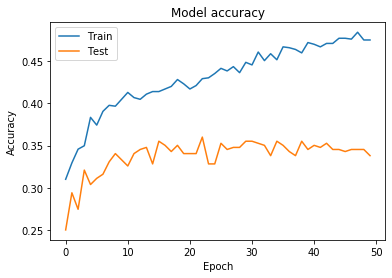

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

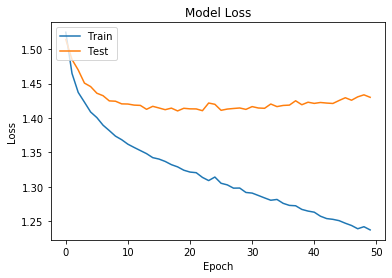

In [0]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [0]:
dataframe=pd.DataFrame(predictions, columns=['0', '1','2','3','4']) 

In [0]:
dataframe

,0,1,2,3,4
0,0.012622,0.177994,0.153732,0.145390,0.510262
1,0.009456,0.123841,0.469728,0.210442,0.186533
2,0.010479,0.324089,0.240361,0.131508,0.293563
3,0.038762,0.124911,0.216774,0.281669,0.337884
4,0.023652,0.050682,0.163789,0.145276,0.616602
...,...,...,...,...,...
406,0.019444,0.075805,0.419609,0.320819,0.164323
407,0.034841,0.340138,0.193405,0.305127,0.126489
408,0.026525,0.351264,0.245254,0.239143,0.137815
409,0.027100,0.273537,0.260519,0.199814,0.239030


In [0]:
from google.colab import files

dataframe.to_csv('df.csv')
files.download('df.csv')